# The Sparks Foundation Network

# Task 1

Predict the percentage of an student based on the no. of study hours.
This is a simple linear regression task as it involves just 2 variables.
● Data can be found at http://bit.ly/w-data

# Imports

** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(we'll import sklearn as you need it.)**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data

In [2]:
datafile = pd.read_csv("Ecommerce Customers")

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
datafile.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
datafile.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**let use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [8]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

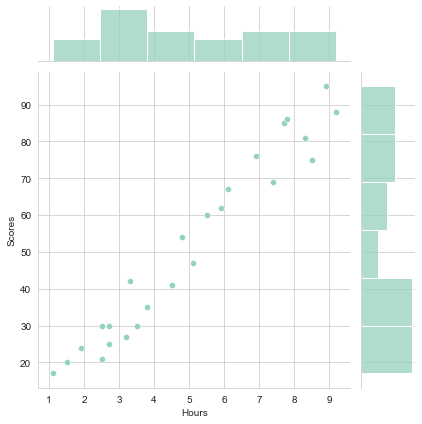

In [11]:
# let's check Hours and Score.
sns.jointplot(x='Hours',y='Scores',data=datafile)

** Doing the same but with the Hours column instead. **

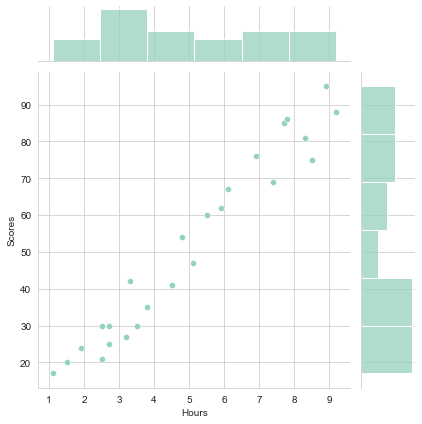

In [12]:
sns.jointplot(x='Hours',y='Scores',data=datafile)

** Use jointplot to create a 2D hex bin plot comparing Hours and Scores.**

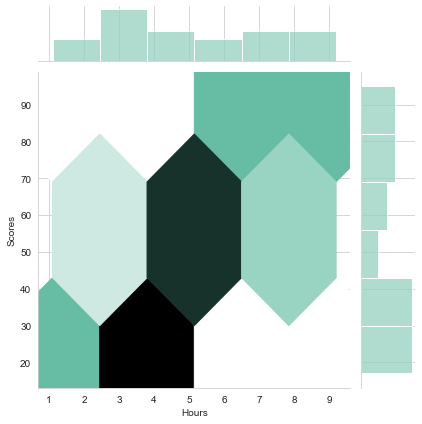

In [19]:
sns.jointplot(x='Hours',y='Scores',kind='hex',data=datafile)

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

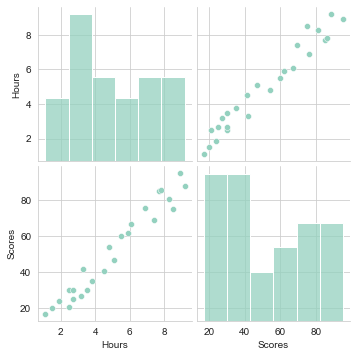

In [20]:
sns.pairplot(datafile)

**Create a linear model plot (using seaborn's lmplot) of Hours vs. Scores. **

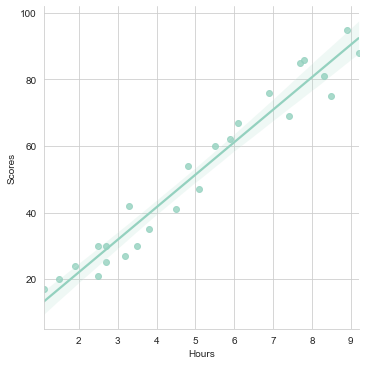

In [21]:
sns.lmplot(x='Hours',y='Scores',data=datafile)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the dataset and a variable y equal to the "Scores" column. **

In [22]:
y = datafile['Scores']

In [23]:
X = datafile[['Hours']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

**Create an instance of a LinearRegression() model named lm.**

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [29]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [30]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [9.96651548]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [31]:
predictions = lm.predict( X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

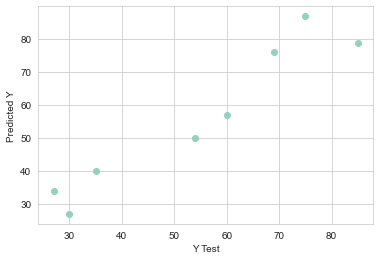

In [32]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [33]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.864954643694258
MSE: 41.634865645528876
RMSE: 6.4525084769823335


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


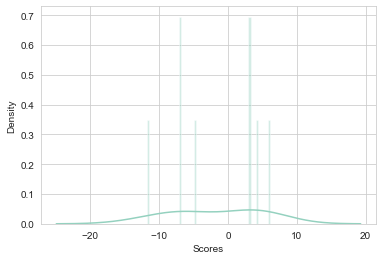

In [34]:
sns.distplot((y_test-predictions),bins=50);

In [35]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Hours,9.966515
